In [6]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')]
    # Added payments.csv for specific handling


# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Fino@ll@fine9',
    database='ecommerce'
)
cursor = conn.cursor()
Folder containing the CSV files
folder_path = "C:\Users\admin\Desktop\ECommerce"


def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'


for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)

    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


SyntaxError: invalid syntax (3213539790.py, line 25)

In [10]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install mysql

   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/203.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/203.3 kB ? eta -:--:--
   ----- --------------------------------- 30.7/203.3 kB 262.6 kB/s eta 0:00:01
   ----- --------------------------------- 30.7/203.3 kB 262.6 kB/s eta 0:00:01
   ------- ------------------------------- 41.0/203.3 kB 164.3 kB/s eta 0:00:01
   ------- ------------------------------- 41.0/

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="Fino@ll@fine9",
                           database="ecommerce")
cur=db.cursor() 


In [16]:
#1. List all unique cities where customers are located.
query = """select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
print(data)


[('franca',), ('sao bernardo do campo',), ('sao paulo',), ('mogi das cruzes',), ('campinas',), ('jaragua do sul',), ('timoteo',), ('curitiba',), ('belo horizonte',), ('montes claros',), ('rio de janeiro',), ('lencois paulista',), ('caxias do sul',), ('piracicaba',), ('guarulhos',), ('pacaja',), ('florianopolis',), ('aparecida de goiania',), ('santo andre',), ('goiania',), ('cachoeiro de itapemirim',), ('sao jose dos campos',), ('sao roque',), ('camacari',), ('resende',), ('sumare',), ('novo hamburgo',), ('sao luis',), ('sao jose',), ('santa barbara',), ('ribeirao preto',), ('ituiutaba',), ('taquarituba',), ('sao jose dos pinhais',), ('barrinha',), ('parati',), ('dourados',), ('trindade',), ('cascavel',), ('fortaleza',), ('brasilia',), ('pelotas',), ('porto alegre',), ('salto',), ('jundiai',), ('cacapava',), ('sao vicente',), ('uberlandia',), ('botelhos',), ('sao goncalo',), ('araucaria',), ('nova iguacu',), ('areia branca',), ('campos dos goytacazes',), ('sao carlos',), ('itajuba',), (

In [18]:
#2. Count the number of orders placed in 2017.
query = """select count(order_purchase_timestamp) from ecommerce.orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
print("\ntotal orders placed in 2017 are : ",data[0][0])


total orders placed in 2017 are :  45101


In [25]:
#3. Find the total sales per category.
query = """SELECT
    upper(products.product_category),
    round(sum(payments.payment_value),2)
FROM
    ecommerce.products
JOIN
    ecommerce.order_items
ON
    products.product_id = order_items.product_id
JOIN
    ecommerce.payments
ON
    payments.order_id = order_items.order_id
    group by  products.product_category"""
cur.execute(query)
data = cur.fetchall()
#print(data)

df=pd.DataFrame(data, columns = ["Category", "Sales"])
print(df)

                       Category       Sales
0                     PERFUMERY  2026954.64
1          FURNITURE DECORATION  5720705.57
2                     TELEPHONY  1947528.20
3                BED TABLE BATH  6850214.68
4                    AUTOMOTIVE  3409177.32
..                          ...         ...
69               CDS MUSIC DVDS     4797.72
70                   LA CUISINE    11654.12
71  FASHION CHILDREN'S CLOTHING     3142.68
72                     PC GAMER     8697.72
73       INSURANCE AND SERVICES     1298.04

[74 rows x 2 columns]


In [29]:
#4. Calculate the percentage of orders that were paid in installments.
query = """select sum(case when payments.payment_installments >= 2 then 1 else 0 end)*100/count(*) percentage from ecommerce.payments;"""
cur.execute(query)
data = cur.fetchall()
print("the %age of orders that were paid in >=1 installments = ",data[0][0])

the %age of orders that were paid in >=1 installments =  49.4176


    NoOfCustomers State
0           41746    SP
4           12852    RJ
2           11635    MG
5            5466    RS
3            5045    PR
1            3637    SC
9            3380    BA
13           2140    DF
8            2033    ES
7            2020    GO
15           1652    PE
12           1336    CE
6             975    PA
16            907    MT
10            747    MA
11            715    MS
21            536    PB
23            495    PI
14            485    RN
19            413    AL
25            350    SE
22            280    TO
20            253    RO
17            148    AM
24             81    AC
18             68    AP
26             46    RR


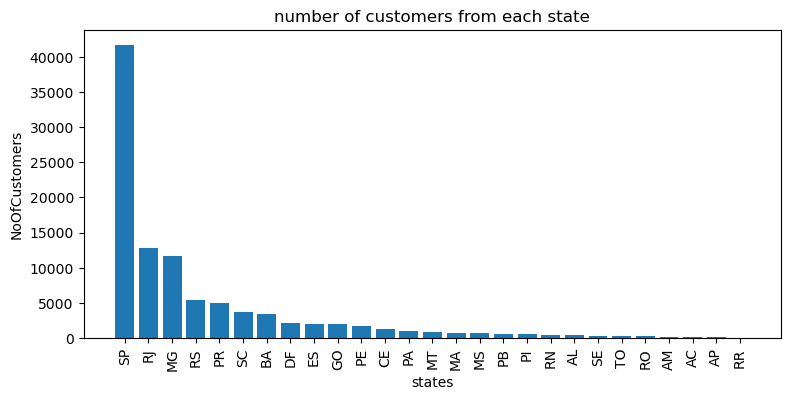

In [35]:
#5. Count the number of customers from each state.
query = """SELECT count(customer_id), customer_state from ecommerce.customers group by customer_state;"""
cur.execute(query)
data = cur.fetchall()

df=pd.DataFrame(data, columns = ["NoOfCustomers", "State"])
df=df.sort_values(by = "NoOfCustomers", ascending = False) 
print(df)

plt.figure(figsize = (9,4)) #width,height
plt.bar(df["State"],df["NoOfCustomers"]) #bar(xaxis.yaxis))
plt.xticks(rotation=90) #rotate x axis tags by 90 degrees
plt.xlabel("states")
plt.ylabel("NoOfCustomers")
plt.title("number of customers from each state")
plt.show()


       Month  CountOfOrders
0      April           6939
1     August           6512
2   February           6728
3    January           7269
4       July           6292
5       June           6167
6      March           7211
7        May           6873
8    October              4
9  September             16


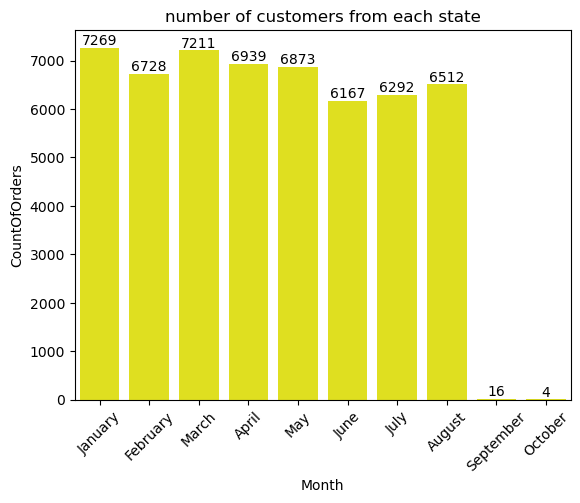

In [37]:
#1. Calculate the number of orders per month in 2018.
query = """select monthname(order_purchase_timestamp), count(order_id) from ecommerce.orders where year(order_purchase_timestamp) = 2018
group by monthname(order_purchase_timestamp) order by monthname(order_purchase_timestamp);"""
cur.execute(query)
data = cur.fetchall()
#print(data)
df=pd.DataFrame(data, columns = ["Month", "CountOfOrders"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]
print(df)
#             #SEABORN CHART
ax = sns.barplot(x = df["Month"],y = df["CountOfOrders"],data = df, order = o, color = "yellow") #bar(xaxis.yaxis, order))
plt.xticks(rotation=45) #rotate x axis tags by 90 degrees
ax.bar_label(ax.containers[0]) # to label values of respective bars
plt.title("number of customers from each state")
plt.show()


In [39]:
#2. Find the average number of products per order, grouped by customer city.
query = """with count_per_order as (SELECT orders.order_id, orders.customer_id,
count(order_items.order_id) as oc
from ecommerce.orders join ecommerce.order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from ecommerce.customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders"""
cur.execute(query)
data = cur.fetchall()
#print(data)
df=pd.DataFrame(data, columns = ["Customer city", "Avg orders"])
print(df)


       Customer city Avg orders
0             sonora       2.00
1          porteiras       2.00
2              itabi       2.00
3       silvanopolis       2.00
4          salmourao       2.00
...              ...        ...
4105  matias olimpio      10.00
4106           datas      12.00
4107   candido godoi      12.00
4108     celso ramos      13.00
4109  padre carvalho      14.00

[4110 rows x 2 columns]


               category  percentage distribution
0        BED TABLE BATH                    21.40
1         HEALTH BEAUTY                    20.71
2  COMPUTER ACCESSORIES                    19.81
3  FURNITURE DECORATION                    17.87
4       WATCHES PRESENT                    17.86


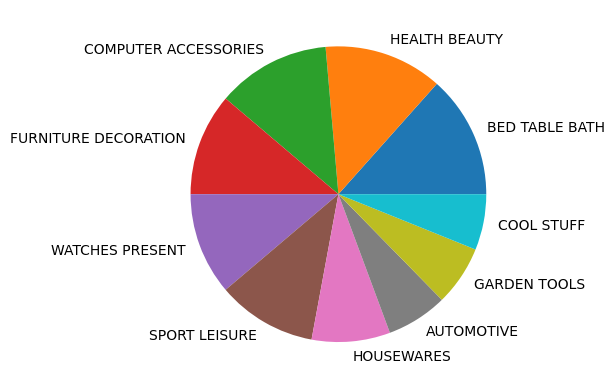

In [55]:
#3. Calculate the percentage of total revenue contributed by each product category.
query = """SELECT upper(products.product_category) category, round((sum(payments.payment_value)/(select sum(payment_value) from ecommerce.payments))*100,2) as sales_percentage FROM ecommerce.products
JOIN ecommerce.order_items ON products.product_id = order_items.product_id
JOIN ecommerce.payments ON payments.order_id = order_items.order_id group by category order by sales_percentage desc;"""
cur.execute(query)  #VALUES DONT MATCH
data = cur.fetchall()
#print(data)
df=pd.DataFrame(data, columns = ["category", "percentage distribution"])
print(df.head())  #TOP 5 VALUES
top10=df.head(10)
plt.pie(top10["percentage distribution"], labels = top10["category"]) #PIE chart
plt.show()

